# Exercise 1
Consider an individual of age $l_0=60$. The table below presents the values of $q_l=P(Y=l+1|Y>l)$ 

In [1]:
age=c(60,61,62,63,64)
ql=c(0.005,0.01,0.0105,0.011,0.012)

cbind(age,ql)

age ql    
[1,] 60  0.0050
[2,] 61  0.0100
[3,] 62  0.0105
[4,] 63  0.0110
[5,] 64  0.0120

Calculate yearly premium paid in advance, as well as mathematical reserve at time $t=0$ for the following products
1. Pure endowment policy with the retirement age $l_r=65$ and benefit $B=1000$
2. Term insurance with the maximum coverage age $l_d=65$ and benefit $B=1000$
3. Endowment insurance with the retirement age $l_r=65$ and death benefit $B_d=1000$ and pension benefit $B_r=1000$.
Assume interest rate to be $r=0.02$.

# Exercise 3.17

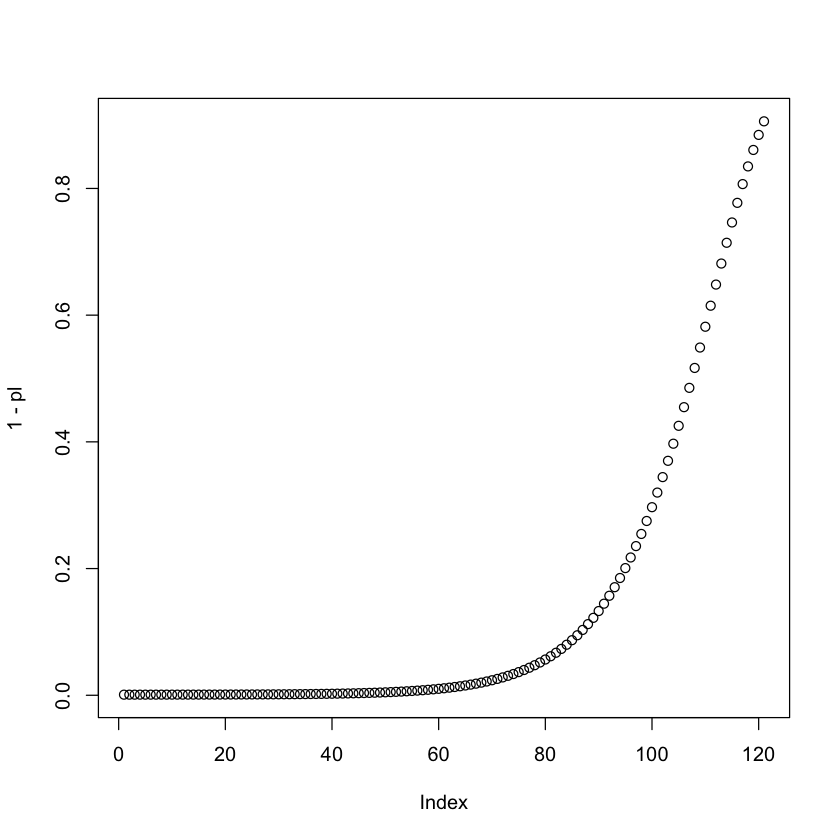

In [23]:
#Inputs
theta0 <- 0.0009
theta1 <- 0.000044
theta2 <- 0.09076
l0 <- c(35,50,65)
K <- 50

#plot mortality Gomperz-Makeham
pl <- exp(-theta0-theta1*exp(theta2*(0:120)))
plot(1-pl)
          

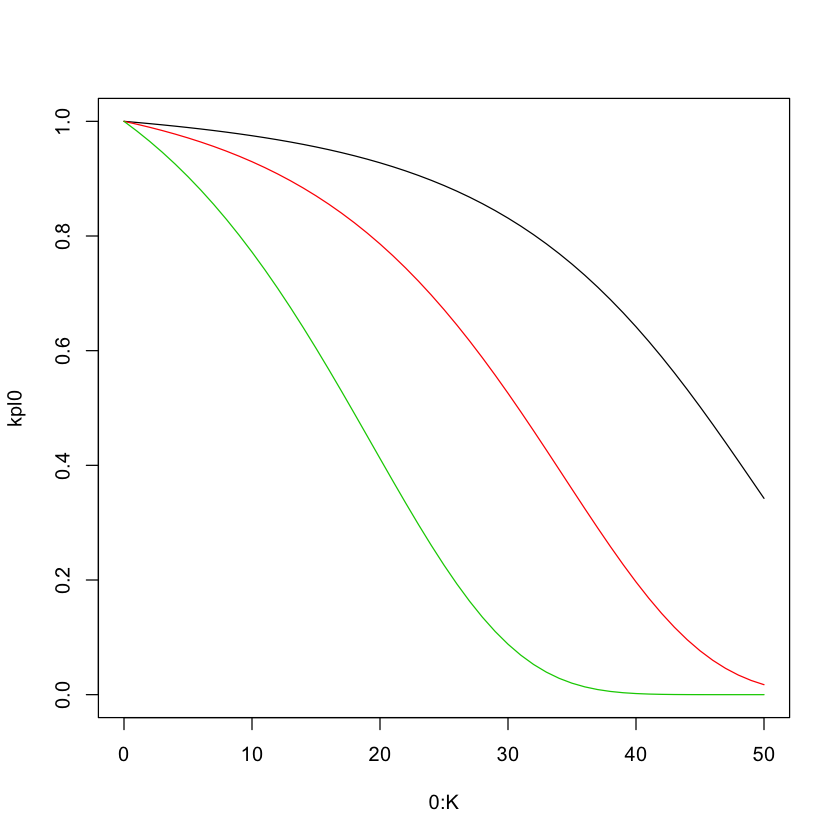

In [26]:
          
#define function 
calculate_K_p_l<-function(theta0,theta1,theta2,l0,K){
    pl <- exp(-theta0-theta1*exp(theta2*(0:(K-1)+l0)))
    kpl0 <- cumprod(c(1,pl))
    return(kpl0)
}

#run and plot
kpl0<-calculate_K_p_l(theta0,theta1,theta2,l0[1],K)
plot(0:K,kpl0,type="l",ylim=c(0,1))

kpl0<-calculate_K_p_l(theta0,theta1,theta2,l0[2],K)
lines(0:K,kpl0,col=2)

kpl0<-calculate_K_p_l(theta0,theta1,theta2,l0[3],K)
lines(0:K,kpl0,col=3)

# Exercise 3.18

In [2]:
#inputs
theta0 <- 0.0009
theta1 <- 0.000044
theta2 <- 0.09076
s <- 1
lr <- 65
r <- 0.02
d <- 1/(1+r)
l0 <- c(20,35,50,65)
le <- 120

#calculate kpl
kpl01 <-calculate_K_p_l(theta0,theta1,theta2,l0[1],le-l0[1])
kpl02 <- calculate_K_p_l(theta0,theta1,theta2,l0[2],le-l0[2])
kpl03 <- calculate_K_p_l(theta0,theta1,theta2,l0[3],le-l0[3])
kpl04 <- calculate_K_p_l(theta0,theta1,theta2,l0[4],le-l0[4])

#calculate premium
pil01 <- s*sum(d^(lr:le-l0[1])*kpl01[lr:le-l0[1]+1])
pil02 <- s*sum(d^(lr:le-l0[2])*kpl02[lr:le-l0[2]+1])
pil03 <- s*sum(d^(lr:le-l0[3])*kpl03[lr:le-l0[3]+1])
pil04 <- s*sum(d^(lr:le-l0[4])*kpl04[lr:le-l0[4]+1])
c(pil01,pil02,pil03,pil04)

[1]  4.938738  6.793074  9.570143 14.803165

In [3]:
#change input
r <- 0.04
d <- 1/(1+r)

#run calculations
pil01 <- s*sum(d^(lr:le-l0[1])*kpl01[lr:le-l0[1]+1])
pil02 <- s*sum(d^(lr:le-l0[2])*kpl02[lr:le-l0[2]+1])
pil03 <- s*sum(d^(lr:le-l0[3])*kpl03[lr:le-l0[3]+1])
pil04 <- s*sum(d^(lr:le-l0[4])*kpl04[lr:le-l0[4]+1])
c(pil01,pil02,pil03,pil04)

[1]  1.728588  3.181554  5.997758 12.414312

# Exercise 3.19

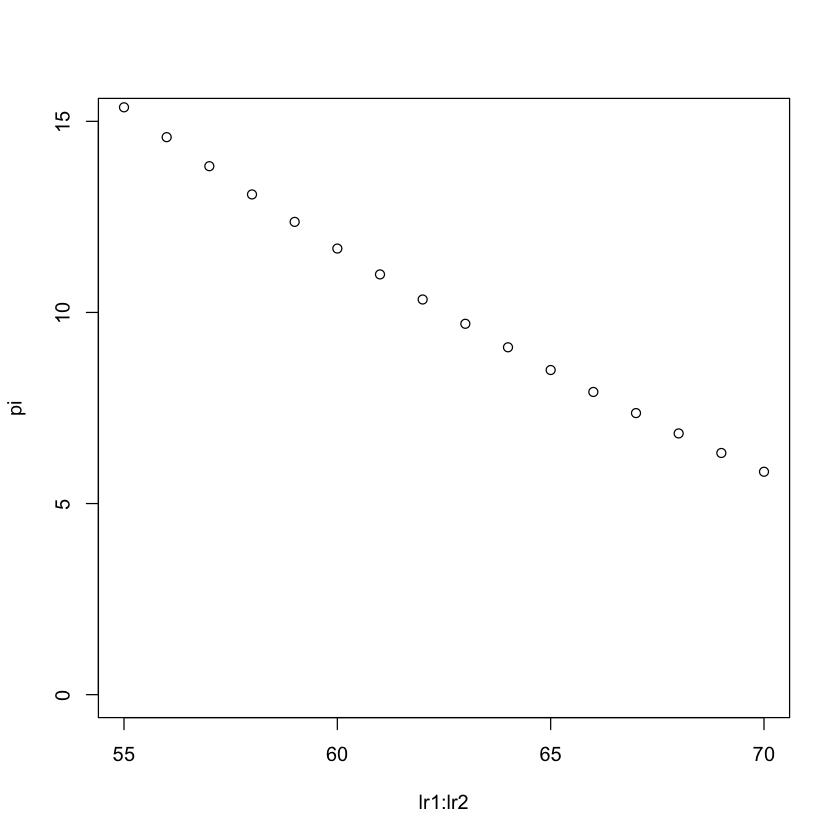

In [9]:
#inputs
theta0 <- 0.0009
theta1 <- 0.000044
theta2 <- 0.09076
s <- 1
lr1 <- 55
lr2 <- 70
r <- 0.02
d <- 1/(1+r)
l0 <- 45
le <- 120

#calculate kpl0
kpl0 <- calculate_K_p_l(theta0,theta1,theta2,l0,le-l0)

#calculate pi
pi <- rep(0,lr2-lr1+1)
for(lr in lr1:lr2)
 {
   pi[lr-lr1+1] <- s*sum(d^(lr:le-l0)*kpl0[lr:le-l0+1])
 }

plot(lr1:lr2,pi,ylim=c(0,15))


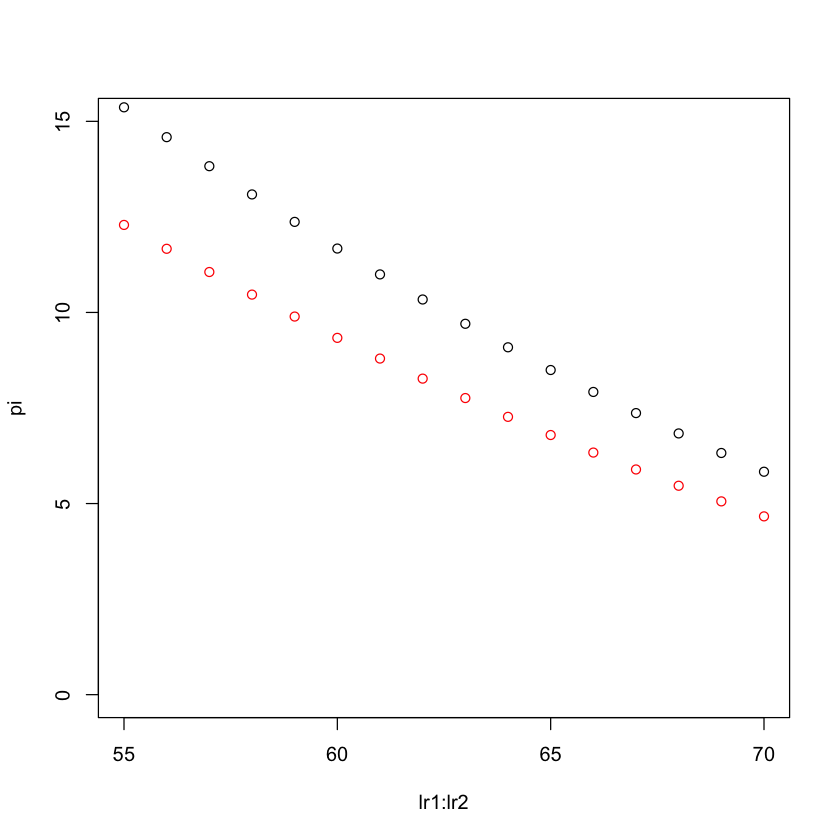

In [10]:
#change input
l0 <- 35

#calculate kpl0
kpl0 <- calculate_K_p_l(theta0,theta1,theta2,l0,le-l0)

#calculate pi

pi_2 <- rep(0,lr2-lr1+1)
for(lr in lr1:lr2)
 {
   pi_2[lr-lr1+1] <- s*sum(d^(lr:le-l0)*kpl0[lr:le-l0+1])
 }

plot(lr1:lr2,pi,ylim=c(0,15))
points(lr1:lr2,pi_2,col=2)

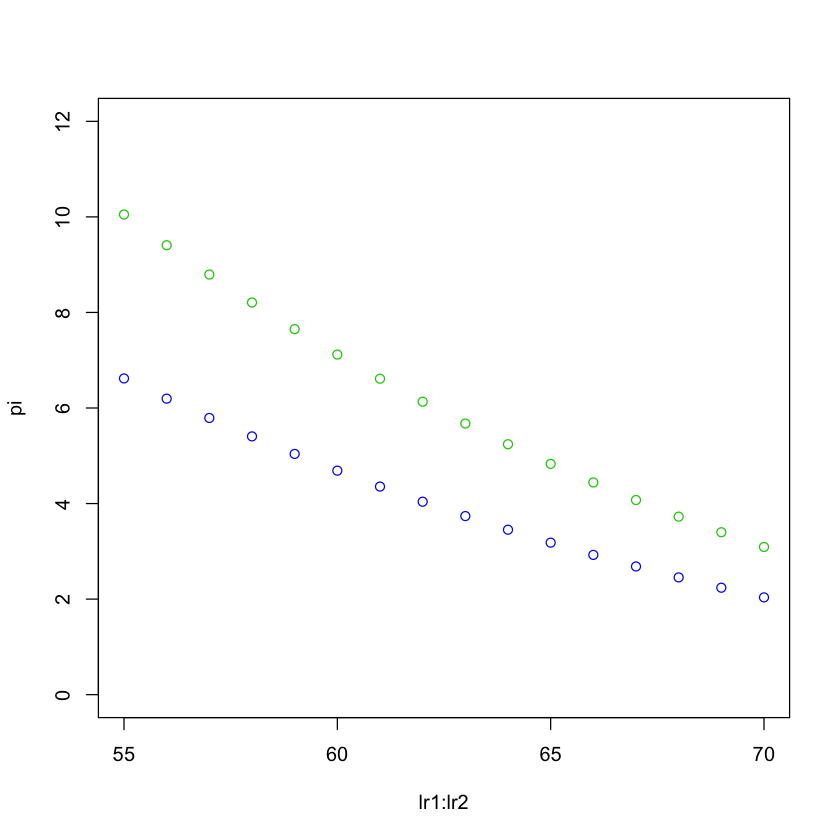

In [12]:
#change inputs
l0 <- 45
r <- 0.04
d <- 1/(1+r)

#calculate kpl0
kpl0 <- calculate_K_p_l(theta0,theta1,theta2,l0,le-l0)

#calculate pi
pi <- rep(0,lr2-lr1+1)
for(lr in lr1:lr2)
 {
   pi[lr-lr1+1] <- s*sum(d^(lr:le-l0)*kpl0[lr:le-l0+1])
 }

plot(lr1:lr2,pi,col=3,ylim=c(0,12))

#change inputs
l0 <- 35

#calculate kpl0
kpl0 <- calculate_K_p_l(theta0,theta1,theta2,l0,le-l0)

pi_2 <- rep(0,lr2-lr1+1)
for(lr in lr1:lr2)
 {
   pi_2[lr-lr1+1] <- s*sum(d^(lr:le-l0)*kpl0[lr:le-l0+1])
 }

points(lr1:lr2,pi_2,col=4)

# Exercise 3.20

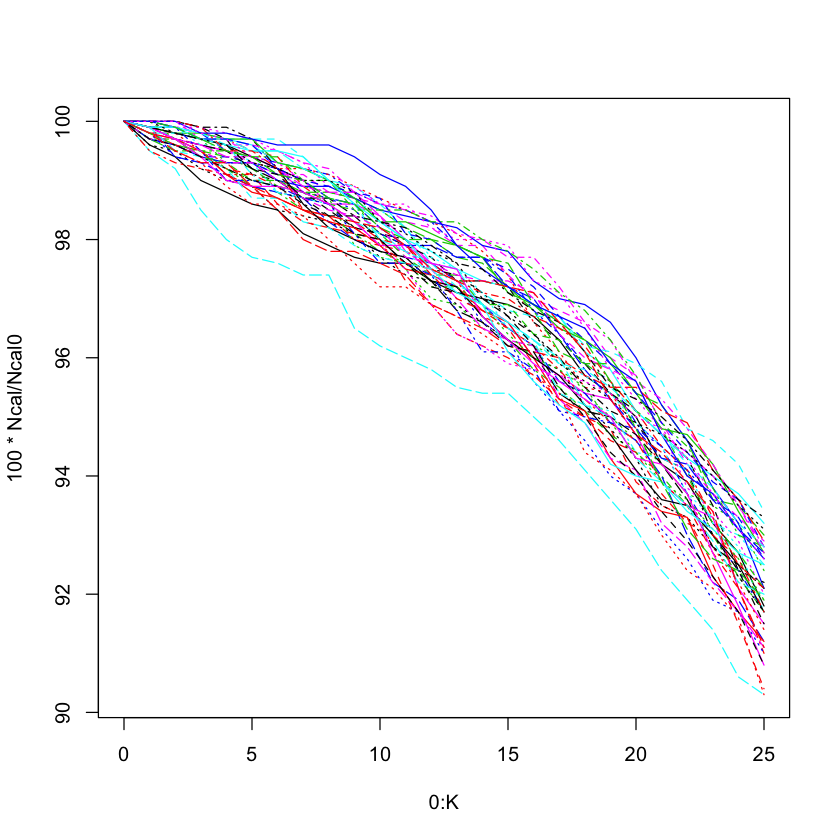

In [13]:
#define inputs
theta0 <- 0.0009
theta1 <- 0.000044
theta2 <- 0.09076
l0 <- 30
K <- 25
Ncal0 <- 1000
m <- 50

#calculate p_l
pl <- exp(-theta0-theta1*exp(theta2*(0:K+l0)))

#simulate the number of people alive
Ncal <- matrix(Ncal0,K+1,m)
for(k in 1:K)
 {
   Ncal[k+1,] <- rbinom(m,Ncal[k,],rep(pl[k],m))
 }

matplot(0:K,100*Ncal/Ncal0,type="l")

# Exercise 3.21

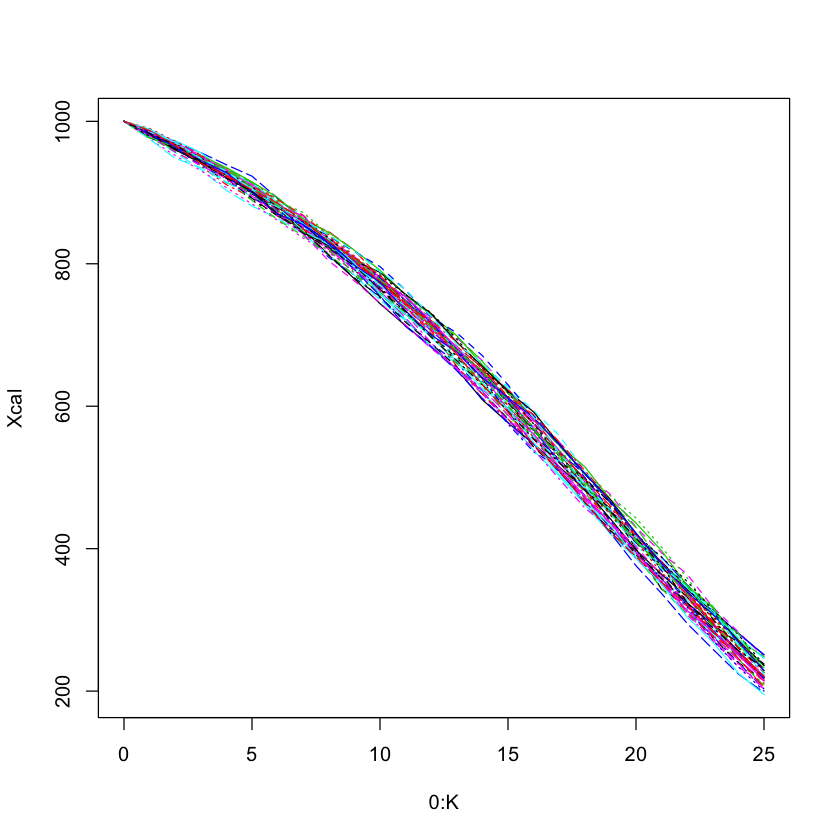

In [15]:
#inputs
theta0 <- 0.0009
theta1 <- 0.000044
theta2 <- 0.09076
l0 <- 65
K <- 25
Ncal0 <- 1000
s <- 1
m <- 50

#calculate pl
pl <- exp(-theta0-theta1*exp(theta2*(0:K+l0)))

#calculate number of people alive
Ncal <- matrix(Ncal0,K+1,m)
for(k in 1:K)
 {
   Ncal[k+1,] <- rbinom(m,Ncal[k,],rep(pl[k],m))
 }
#calculate payouts
Xcal <- s*Ncal

matplot(0:K,Xcal,type="l")

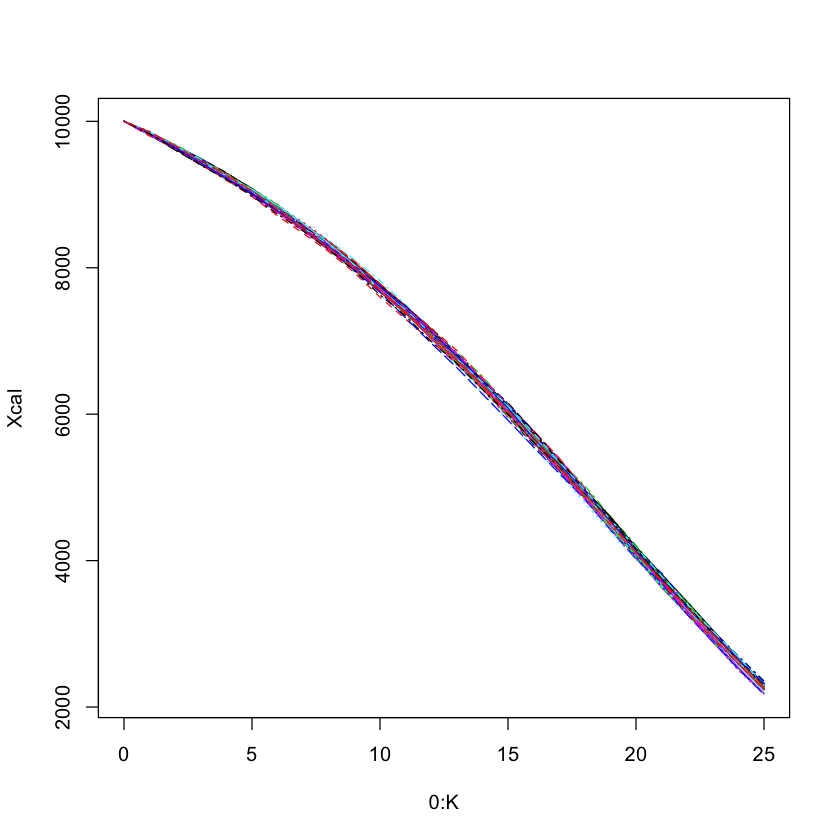

In [16]:
#redefine inputs
Ncal0 <- 10000
Ncal <- matrix(Ncal0,K+1,m)

for(k in 1:K)
 {
   Ncal[k+1,] <- rbinom(m,Ncal[k,],rep(pl[k],m))
 }
Xcal <- s*Ncal

matplot(0:K,Xcal,type="l")

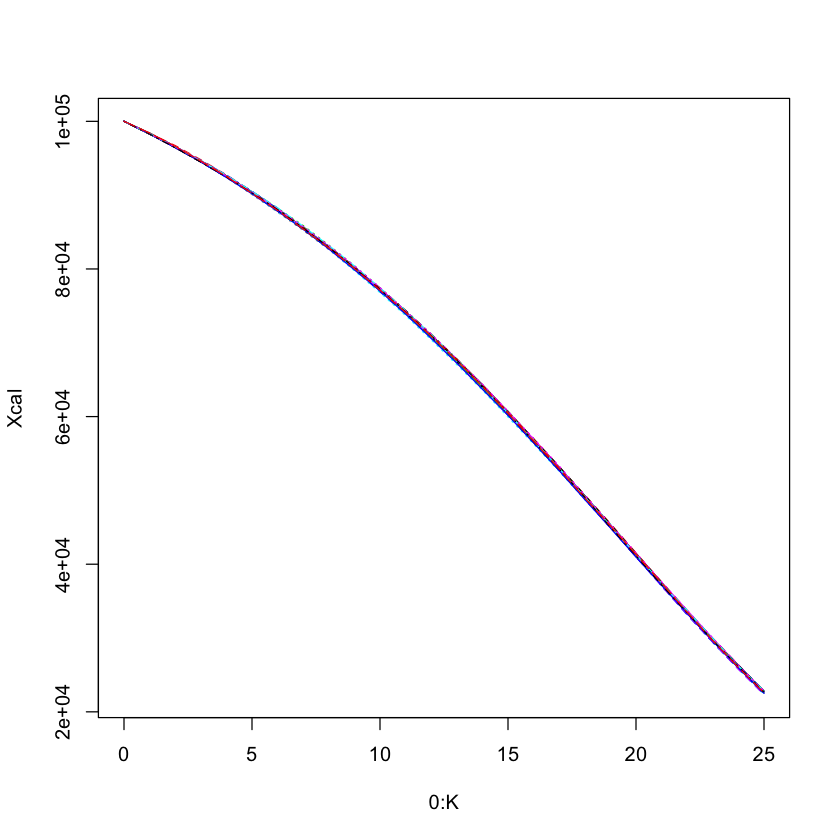

In [17]:
#redefine inputs
Ncal0 <- 100000
Ncal <- matrix(Ncal0,K+1,m)
for(k in 1:K)
 {
   Ncal[k+1,] <- rbinom(m,Ncal[k,],rep(pl[k],m))
 }
Xcal <- s*Ncal


matplot(0:K,Xcal,type="l")

# Exercise 3.22

In [14]:
#define inputs
theta0 <- 0.0009
theta1 <- 0.000044
theta2 <- 0.09076
l0 <- 30
K <- 25
Ncal0 <- 1000
m <- 50

#calcule p_l
pl <- exp(-theta0-theta1*exp(theta2*(0:K+l0)))

#calculate the number of people alive
Ncal <- matrix(Ncal0,K+1,m)
for(k in 1:K)
{
  Ncal[k+1,] <- rbinom(m,Ncal[k,],rep(pl[k],m))
}

#calculate payouts
Xcal <- s*(Ncal[1:K,] - Ncal[1:K+1,])

matplot(1:K,Xcal,type="l")

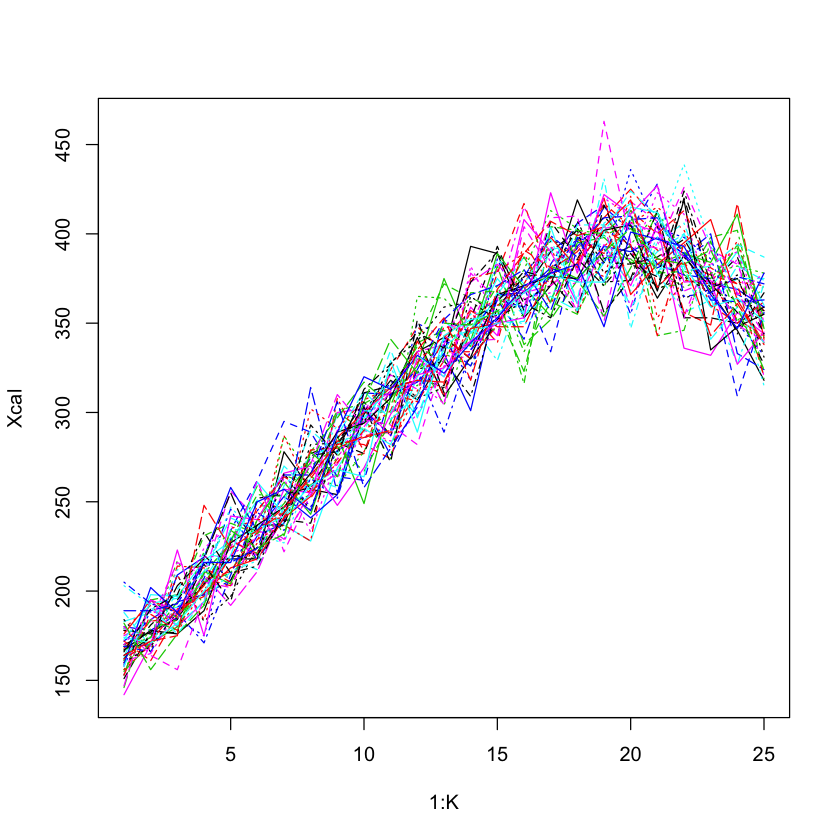

In [18]:
#redefine inputs
Ncal0 <- 10000
m <- 50


#calculate number of people alive
Ncal <- matrix(Ncal0,K+1,m)
for(k in 1:K)
{
  Ncal[k+1,] <- rbinom(m,Ncal[k,],rep(pl[k],m))
}

#calculate payouts
Xcal <- s*(Ncal[1:K,] - Ncal[1:K+1,])

matplot(1:K,Xcal,type="l")

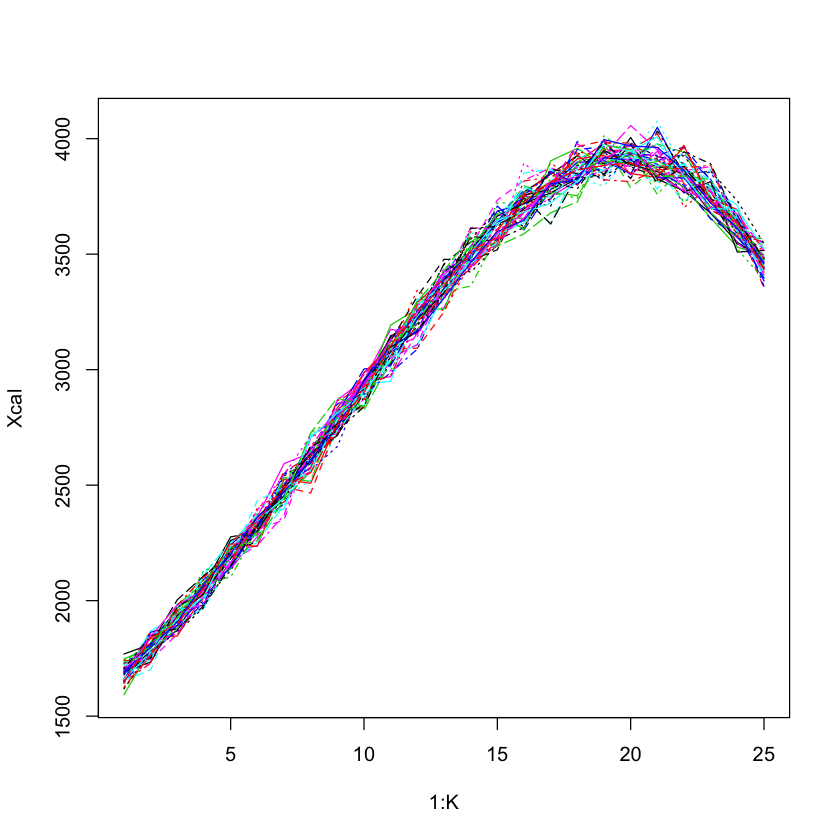

In [19]:
#redefine inputs
Ncal0 <- 100000
m <- 50

#calc number of people alibe
Ncal <- matrix(Ncal0,K+1,m)
for(k in 1:K)
{
  Ncal[k+1,] <- rbinom(m,Ncal[k,],rep(pl[k],m))
}

#calculate paouts
Xcal <- s*(Ncal[1:K,] - Ncal[1:K+1,])

matplot(1:K,Xcal,type="l")